In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [20]:
#Criando um dataset grande
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5*x_data)+5+noise
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df, y_df],axis=1)

In [21]:
#y = mx+b
#b = 5

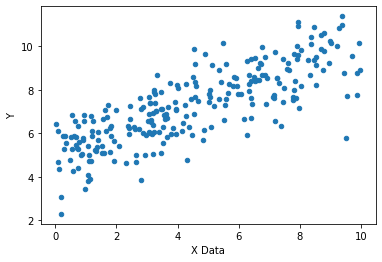

In [22]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [23]:
batch_size = 8

In [24]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [25]:
#Criando os placeholders
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [26]:
y_model= m*xph+b

In [27]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [28]:
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [30]:
with tf.Session() as sess:
    sess.run(init)
    batchs = 1000
    for i in range(batchs):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [31]:
model_m

0.52963656

In [32]:
model_b

4.9148436

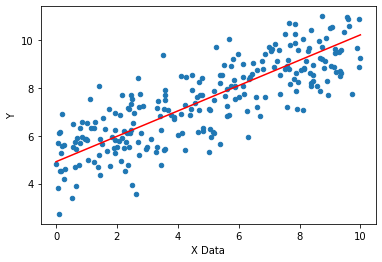

In [33]:
y_hat = x_data*model_m+model_b
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

## Estimator API TENSOR FLOW

In [34]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [35]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a351c0a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [37]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=8, num_epochs=None, shuffle=True)

In [38]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [39]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [40]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp/model.ckpt.
INFO:tensorflow:loss = 456.5043, step = 1
INFO:tensorflow:global_step/sec: 706.51
INFO:tensorflow:loss = 35.13549, step = 101 (0.141 sec)
INFO:tensorflow:global_step/sec: 973.918
INFO:tensorflow:loss = 19.276314, step = 201 (0.103 sec)
INFO:tensorflow:global_step/sec: 960.91
INFO:tensorflow:loss = 6.2218313, step = 301 (0.105 sec)
INFO:tensorflo

In [41]:
#Validando
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-18T23:00:53Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-03-18-23:00:54
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0775868, global_step = 1000, label

In [42]:

eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-18T23:02:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-03-18-23:02:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0717499, global_step = 1000, label/mean = 7.474197, loss = 8.573999, prediction/mean = 7.403617
INFO:tensorflow:Saving 'c

In [44]:
#Quando os valores estão aproximados um do outro é um bom sinal que não over/under fitting
print('Training data metrics')
print(train_metrics)
print('Eval data metrics')
print(eval_metrics)

Training data metrics
{'average_loss': 1.0775868, 'label/mean': 7.510075, 'loss': 8.620694, 'prediction/mean': 7.424895, 'global_step': 1000}
Eval data metrics
{'average_loss': 1.0717499, 'label/mean': 7.474197, 'loss': 8.573999, 'prediction/mean': 7.403617, 'global_step': 1000}


In [45]:
#Predição com novos valores
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4786425], dtype=float32)},
 {'predictions': array([5.133071], dtype=float32)},
 {'predictions': array([5.7874994], dtype=float32)},
 {'predictions': array([6.441928], dtype=float32)},
 {'predictions': array([7.0963564], dtype=float32)},
 {'predictions': array([7.7507844], dtype=float32)},
 {'predictions': array([8.405212], dtype=float32)},
 {'predictions': array([9.059641], dtype=float32)},
 {'predictions': array([9.714069], dtype=float32)},
 {'predictions': array([10.368498], dtype=float32)}]

In [46]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/6_/ckjyzpw135jggscw0gczxhnw0000gn/T/tmpev5idlrp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
predictions

[array([4.4786425], dtype=float32),
 array([5.133071], dtype=float32),
 array([5.7874994], dtype=float32),
 array([6.441928], dtype=float32),
 array([7.0963564], dtype=float32),
 array([7.7507844], dtype=float32),
 array([8.405212], dtype=float32),
 array([9.059641], dtype=float32),
 array([9.714069], dtype=float32),
 array([10.368498], dtype=float32)]

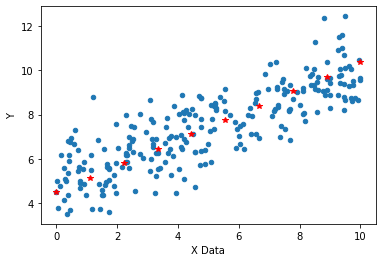

In [52]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')